In [63]:
import os
import subprocess

test_errors = []
train_errors = []

# for test errors
for i in range(40):
    proc = subprocess.Popen(['test', 'test%02d.data' %i, 'train%02d.data' % i], stdout=subprocess.PIPE)
    test_errors.append(float(proc.communicate()[0].decode("utf-8")))
# for train errors
for i in range(40):
    proc = subprocess.Popen(['test', 'train%02d.data' %i, 'train%02d.data' % i], stdout=subprocess.PIPE)
    train_errors.append(float(proc.communicate()[0].decode("utf-8")))

In [64]:
test_errors_without_boosting = []
train_errors_without_boosting = []

# for test errors without boosting
for i in range(40):
    proc = subprocess.Popen(['test_new', 'test%02d.data' %i, 'train%02d.data' % i, '-1', '0'], stdout=subprocess.PIPE)
    test_errors_without_boosting.append(float(proc.communicate()[0].decode("utf-8")))
# for train errors withou boosting
for i in range(40):
    proc = subprocess.Popen(['test_new', 'train%02d.data' %i, 'train%02d.data' % i, '-1', '0'], stdout=subprocess.PIPE)
    train_errors_without_boosting.append(float(proc.communicate()[0].decode("utf-8")))

In [65]:
import numpy as np
test_errors=np.asarray(list(map(float, test_errors)))
train_errors=np.asarray(list(map(float, train_errors)))

test_errors_without_boosting = np.asarray(list(map(float, test_errors_without_boosting)))
train_errors_without_boosting = np.asarray(list(map(float, train_errors_without_boosting)))

test_errors = test_errors/888
train_errors = train_errors/2663

test_errors_without_boosting = test_errors_without_boosting/888
train_errors_without_boosting =train_errors_without_boosting/2663

(array([2., 6., 6., 2., 6., 3., 0., 7., 6., 2.]),
 array([ 4.30549838,  5.14257162,  5.97964485,  6.81671809,  7.65379132,
         8.49086456,  9.3279378 , 10.16501103, 11.00208427, 11.8391575 ,
        12.67623074]),
 <BarContainer object of 10 artists>)

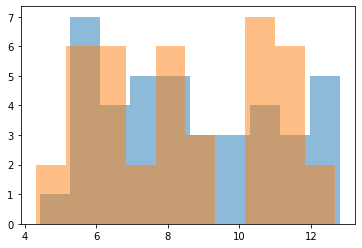

In [66]:
import matplotlib.pyplot as plt
plt.hist(test_errors,alpha=0.5)
plt.hist(train_errors,alpha=0.5)

In [67]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(test_errors, train_errors, method="exact")
print(U1)
print(p)

853.0
0.6152732938890534


(array([2., 6., 4., 4., 5., 1., 5., 3., 7., 3.]),
 array([ 4.96938069,  6.2270242 ,  7.48466772,  8.74231123,  9.99995475,
        11.25759827, 12.51524178, 13.7728853 , 15.03052882, 16.28817233,
        17.54581585]),
 <BarContainer object of 10 artists>)

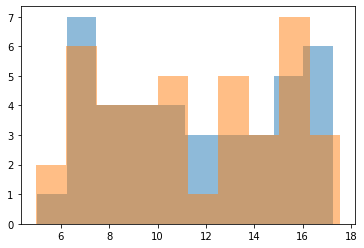

In [68]:

plt.hist(test_errors_without_boosting,alpha=0.5)
plt.hist(train_errors_without_boosting,alpha=0.5)

In [69]:
U1, p = mannwhitneyu(test_errors_without_boosting, train_errors_without_boosting, method="exact")
print(U1)
print(p)

810.0
0.9275738274418169
